In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [7]:
print("Dimensions before removing null values")
data.shape
print("Null values?")
print(data.isnull().any())

Dimensions before removing null values
Null values?
employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool


In [8]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [10]:
dept = data.iloc[:,[1,12]].copy()
dept_per = dept.copy()
print(dept_per)

              department  is_promoted
0      Sales & Marketing            0
1             Operations            0
2      Sales & Marketing            0
3      Sales & Marketing            0
4             Technology            0
...                  ...          ...
54803         Technology            0
54804         Operations            0
54805          Analytics            0
54806  Sales & Marketing            0
54807                 HR            0

[54808 rows x 2 columns]


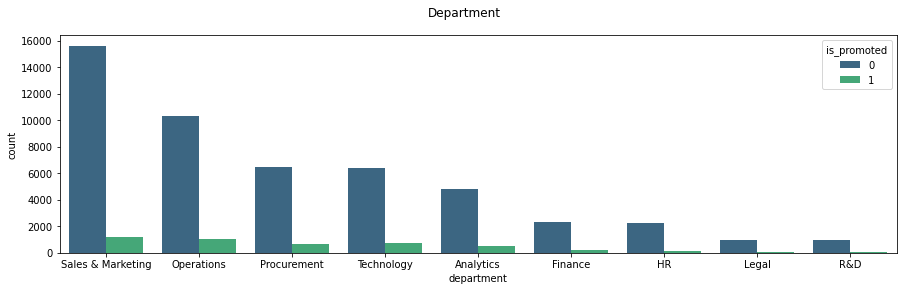

In [11]:
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=data, palette="viridis",hue="is_promoted", order = data['department'].value_counts().index)
ax.grid(False)
plt.suptitle("Department")
plt.show()

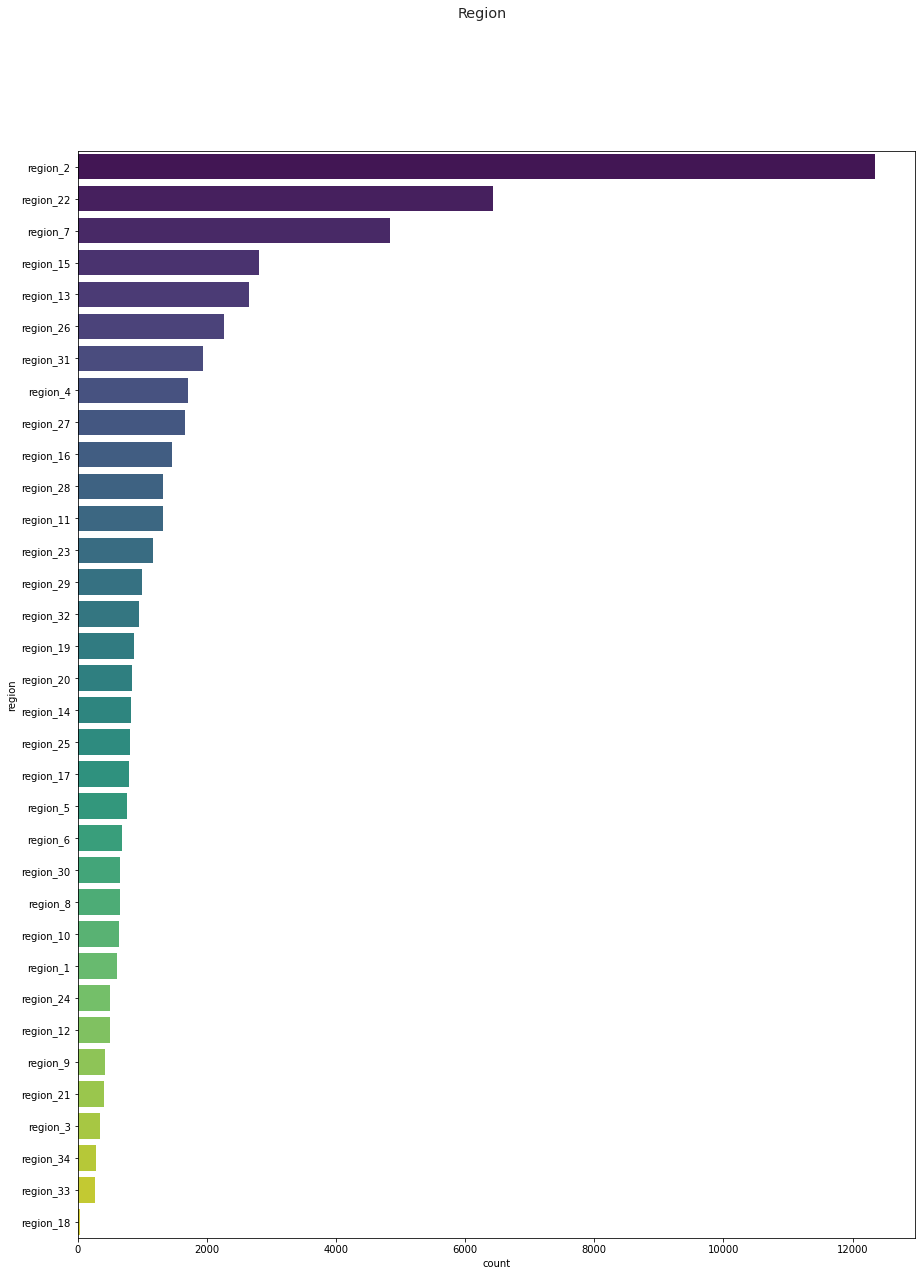

In [12]:
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=data, 
                    palette="viridis", order = data['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region")
plt.show()

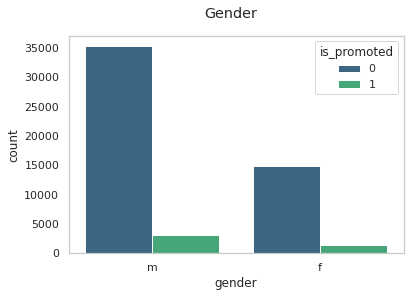

In [13]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="gender",data=data, palette="viridis",hue="is_promoted", order=data['gender'].value_counts().index)
sns.set(style="whitegrid")
ax.grid(False)
plt.suptitle("Gender")
plt.show()

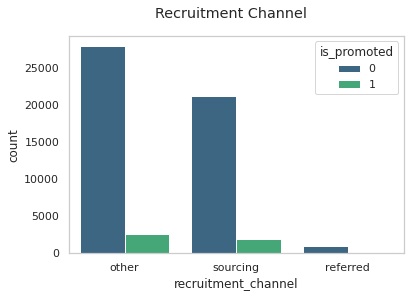

In [14]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="recruitment_channel",data=data, palette="viridis",hue="is_promoted", order=data['recruitment_channel'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Recruitment Channel")
plt.show()

In [15]:
data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [16]:
data.is_promoted.value_counts()


0    50140
1     4668
Name: is_promoted, dtype: int64

In [17]:
data_test = pd.read_csv('test.csv')

In [18]:
merged = data
merged = merged.append(data_test)
merged.shape

(78298, 13)

In [19]:
data_merged = pd.DataFrame(merged)
data_merged['education'].replace(np.nan, 'missing', inplace=True)
data_merged['previous_year_rating'].replace(np.nan, data_merged['previous_year_rating'].median(), inplace=True)
print(data_merged.shape)
print("Null values?")
print(data_merged.isnull().any())

(78298, 13)
Null values?
employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
awards_won?             False
avg_training_score      False
is_promoted              True
dtype: bool


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(data_merged[['department','region','education','gender','recruitment_channel']]).toarray()
ohe_labels = ohe.get_feature_names(['department','region','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
data_merged.drop(columns= ['department','region','education','gender','recruitment_channel'], inplace=True)

In [22]:
data_merged.reset_index(inplace=True)
data_merged = pd.concat([data_merged,ohe_df],axis=1,join='inner')
data_merged.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         78298 non-null  int64  
 1   employee_id                   78298 non-null  int64  
 2   no_of_trainings               78298 non-null  int64  
 3   age                           78298 non-null  int64  
 4   previous_year_rating          78298 non-null  float64
 5   length_of_service             78298 non-null  int64  
 6   awards_won?                   78298 non-null  int64  
 7   avg_training_score            78298 non-null  int64  
 8   is_promoted                   54808 non-null  float64
 9   department_Analytics          78298 non-null  float64
 10  department_Finance            78298 non-null  float64
 11  department_HR                 78298 non-null  float64
 12  department_Legal              78298 non-null  float64
 13  d

In [23]:
data_merged.drop(columns= ['index'], inplace=True)
data_merged.shape

(78298, 60)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_merged[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(data_merged[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
data_merged.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0.000000,0.375,1.0,0.194444,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.0,0.083333,0.0,0.350000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.5,0.166667,0.0,0.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.0,0.250000,0.0,0.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.5,0.027778,0.0,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
seed_value = 12321
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

In [26]:
train, test = data_merged[~data_merged['is_promoted'].isnull()], data_merged[data_merged['is_promoted'].isnull()]
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 60)
Shape of Test Dataset:  (23490, 60)


In [27]:
train.drop(columns=['employee_id'],inplace=True)
print("Shape of Train Dataset: ",train.shape)

Shape of Train Dataset:  (54808, 59)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3,random_state=seed_value)
print("Shape of X Train Dataset: ",X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)
print("Shape of X Valid Dataset: ",X_valid.shape)
print("Shape of Y Valid Dataset: ",y_valid.shape)

Shape of X Train Dataset:  (38365, 58)
Shape of Y Train Dataset:  (38365,)
Shape of X Valid Dataset:  (16443, 58)
Shape of Y Valid Dataset:  (16443,)


In [29]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

avg_training_score              0.027484
previous_year_rating            0.012679
awards_won?                     0.009639
length_of_service               0.004402
education_Bachelor's            0.004049
age                             0.002979
gender_m                        0.002779
recruitment_channel_sourcing    0.002546
region_region_19                0.002184
region_region_13                0.002184
department_R&D                  0.001767
education_Master's & above      0.001431
recruitment_channel_other       0.001270
region_region_4                 0.001265
department_Technology           0.001216
region_region_2                 0.001158
region_region_29                0.000979
region_region_22                0.000975
region_region_17                0.000905
region_region_9                 0.000882
region_region_14                0.000879
region_region_16                0.000866
region_region_20                0.000796
region_region_10                0.000757
region_region_27

In [30]:
from sklearn.feature_selection import SelectKBest

select_top40 = SelectKBest(mutual_info_classif,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

Index(['no_of_trainings', 'age', 'previous_year_rating', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_HR',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_16', 'region_region_18',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_28', 'region_region_32',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'education_missing', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [31]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select].head(5)

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_HR,department_R&D,department_Sales & Marketing,department_Technology,region_region_11,region_region_12,region_region_13,region_region_16,region_region_18,region_region_2,region_region_20,region_region_21,region_region_23,region_region_24,region_region_25,region_region_26,region_region_28,region_region_32,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
26344,0.111111,0.325,1.00,0.0,0.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21538,0.000000,0.300,1.00,0.0,0.383333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15489,0.000000,0.825,0.25,0.0,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15565,0.000000,0.275,1.00,0.0,0.116667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48575,0.000000,0.525,0.50,0.0,0.816667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
#SVM
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_valid,y_valid))

train accuracy: 0.925426821321517
test accuracy: 0.9294532627865961


In [33]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_SVM_all = svm.predict(X_valid)
print(classification_report(y_valid, prediction_SVM_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15100
           1       0.97      0.14      0.24      1343

    accuracy                           0.93     16443
   macro avg       0.95      0.57      0.60     16443
weighted avg       0.93      0.93      0.90     16443



In [34]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

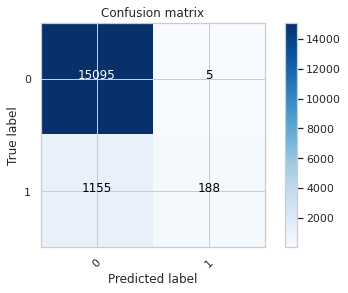

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=5,n_estimators=100)
model_rf.fit(X_train,y_train)
print("train accuracy:",model_rf.score(X_train,y_train))
print("test accuracy:",model_rf.score(X_valid,y_valid))

train accuracy: 0.920474390720709
test accuracy: 0.9250744997871435


In [37]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_RandomForest_all = model_rf.predict(X_valid)
print(classification_report(y_valid, prediction_RandomForest_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15100
           1       1.00      0.08      0.15      1343

    accuracy                           0.93     16443
   macro avg       0.96      0.54      0.56     16443
weighted avg       0.93      0.93      0.89     16443



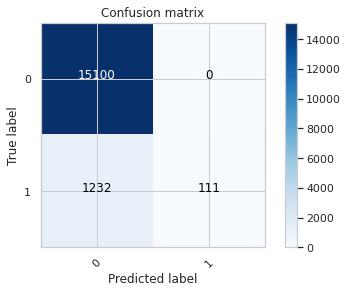

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_RandomForest_all)
plot_confusion_matrix(cm,class_names)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100)
model_adaboost.fit(X_train,y_train)
print("train accuracy:",model_adaboost.score(X_train,y_train))
print("test accuracy:",model_adaboost.score(X_valid,y_valid))

train accuracy: 0.9285546722272905
test accuracy: 0.9328589673417259


In [40]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_AdaBoost_all = model_adaboost.predict(X_valid)
print(classification_report(y_valid, prediction_AdaBoost_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15100
           1       0.85      0.22      0.35      1343

    accuracy                           0.93     16443
   macro avg       0.89      0.61      0.66     16443
weighted avg       0.93      0.93      0.91     16443



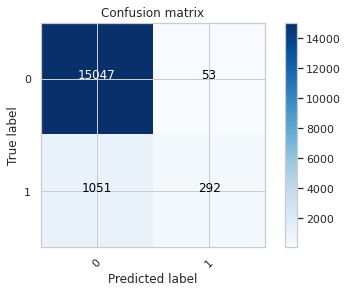

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_AdaBoost_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(3)
model_knn.fit(X_train,y_train)
print("train accuracy:",model_knn.score(X_train,y_train))
print("test accuracy:",model_knn.score(X_valid,y_valid))

In [ ]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_KNN_all = model_knn.predict(X_valid)
print(classification_report(y_valid, prediction_KNN_all, target_names=class_names))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_KNN_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train,y_train)
print("train accuracy:",model_dt.score(X_train,y_train))
print("test accuracy:",model_dt.score(X_valid,y_valid))

In [ ]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_DT_all = model_dt.predict(X_valid)
print(classification_report(y_valid, prediction_DT_all, target_names=class_names))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_DT_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
print("train accuracy:",model_nb.score(X_train,y_train))
print("test accuracy:",model_nb.score(X_valid,y_valid))

In [ ]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_NB_all = model_nb.predict(X_valid)
print(classification_report(y_valid, prediction_NB_all, target_names=class_names))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_NB_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
# Import required libraries for ANN
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

print("train accuracy:",mlp.score(X_train,y_train))
print("test accuracy:",mlp.score(X_valid,y_valid))

In [ ]:
from sklearn.metrics import classification_report
class_names=np.array(['0','1'])
prediction_ANN_all = mlp.predict(X_valid)
print(classification_report(y_valid, prediction_ANN_all, target_names=class_names))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, prediction_ANN_all)
plot_confusion_matrix(cm,class_names)